In [2]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2

In [3]:
c='Cyber Security Breaches.csv'
df=pd.read_csv(c)
#print(df)

In [9]:
df.shape

(718, 8)

In [3]:
cols = ['Type_of_Breach','Summary','State','Individuals_Affected','Name_of_Covered_Entity'
        ,'Location_of_Breached_Information','year','Date_Posted_or_Updated']

In [4]:
    year_order = df['year'].value_counts().index
    state_order = df['State'].value_counts().index
    attack_order = df['Type_of_Breach'].value_counts().index

In [5]:
df = df[cols].reset_index(drop=True)
df =df.loc[df['year']>2006]
df =df.loc[df['State'].isin(state_order[:20])]
# breaches = df.Type_of_Breach.value_counts()[:6].index
df = df.loc[df['Type_of_Breach'].isin(attack_order[:6])]
df['Summary'] = df['Summary'].fillna('No Summary')

In [6]:
df.shape


(718, 8)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Type_of_Breach                    718 non-null    object
 1   Summary                           718 non-null    object
 2   State                             718 non-null    object
 3   Individuals_Affected              718 non-null    int64 
 4   Name_of_Covered_Entity            718 non-null    object
 5   Location_of_Breached_Information  718 non-null    object
 6   year                              718 non-null    int64 
 7   Date_Posted_or_Updated            718 non-null    object
dtypes: int64(2), object(6)
memory usage: 33.7+ KB


In [8]:
df.describe()

,Individuals_Affected,year
count,7.180000e+02,718.000000
mean,2.691706e+04,2011.518106
std,1.880920e+05,1.387966
min,5.000000e+02,2007.000000
25%,1.000000e+03,2010.000000
50%,2.262500e+03,2012.000000
75%,6.658750e+03,2013.000000
max,4.029530e+06,2014.000000


Which year has the highest number of attacks?
What is the most common cyber-attack?
What is the most reported cyber-attack state?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text xticklabel objects>)

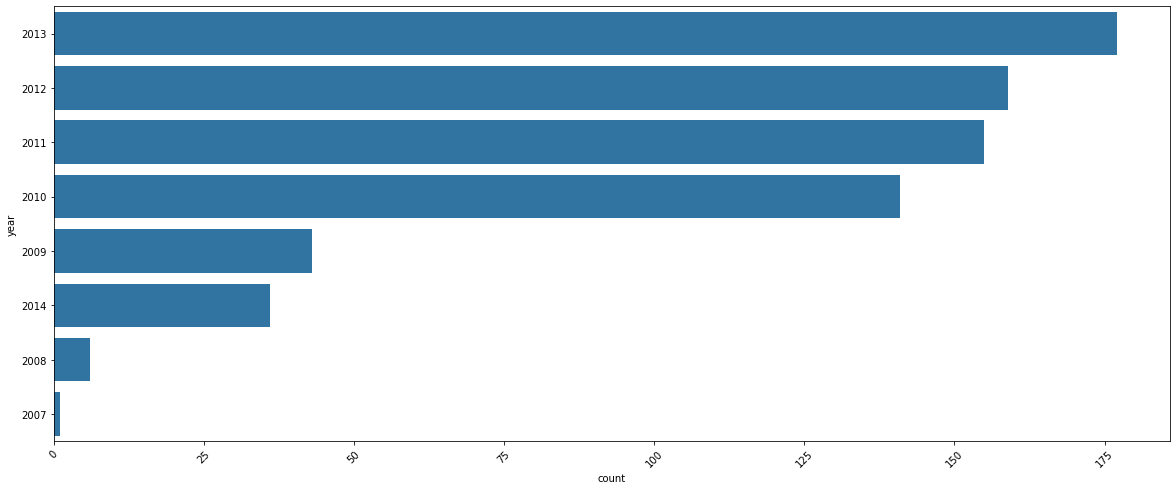

In [18]:

base_color = sns.color_palette()[0]
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

plt.figure(figsize=(20,8))
sns.countplot(data=df,y='year',color=base_color,order=year_order)
plt.xticks(rotation=45)

2013 is worst

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

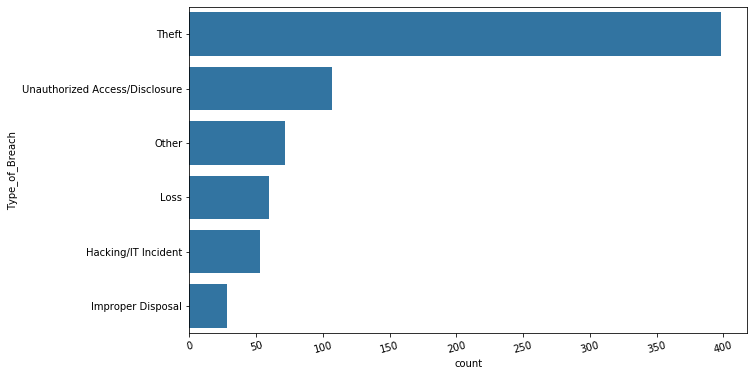

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y='Type_of_Breach',color=base_color,order=attack_order)
plt.xticks(rotation=15)

Since theft is most comon crime, let's see the state sunshine state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

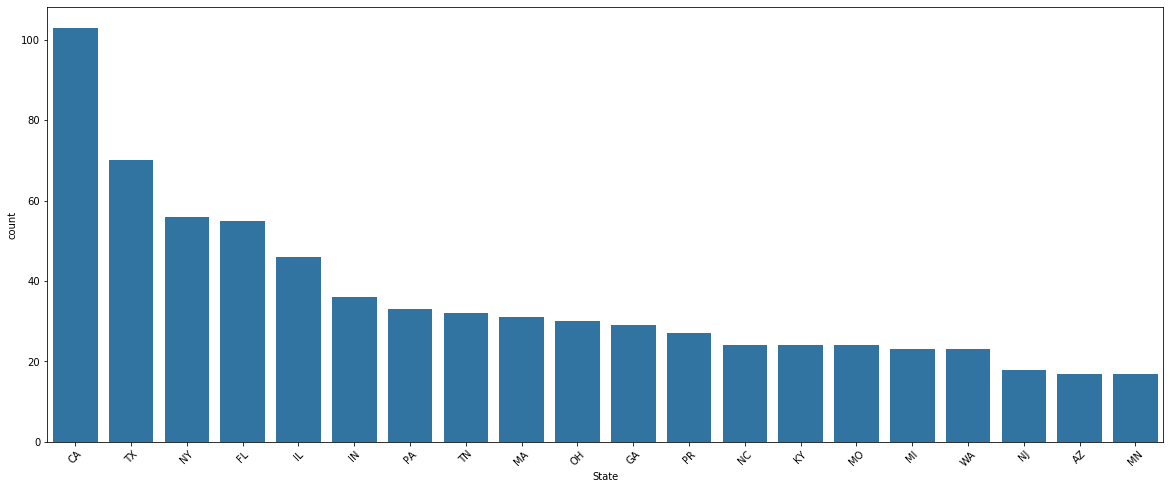

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='State',color=base_color,order=state_order)
plt.xticks(rotation=45)


What is the relation between the year and Individuals Affected ?

In [33]:
cyber=df[['Individuals_Affected', 'year','State','Type_of_Breach']].copy()

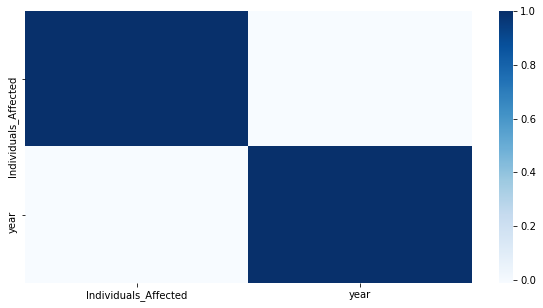

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(cyber.corr(),cmap='Blues')
plt.show()

(array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015.]),
 <a list of 10 Text xticklabel objects>)

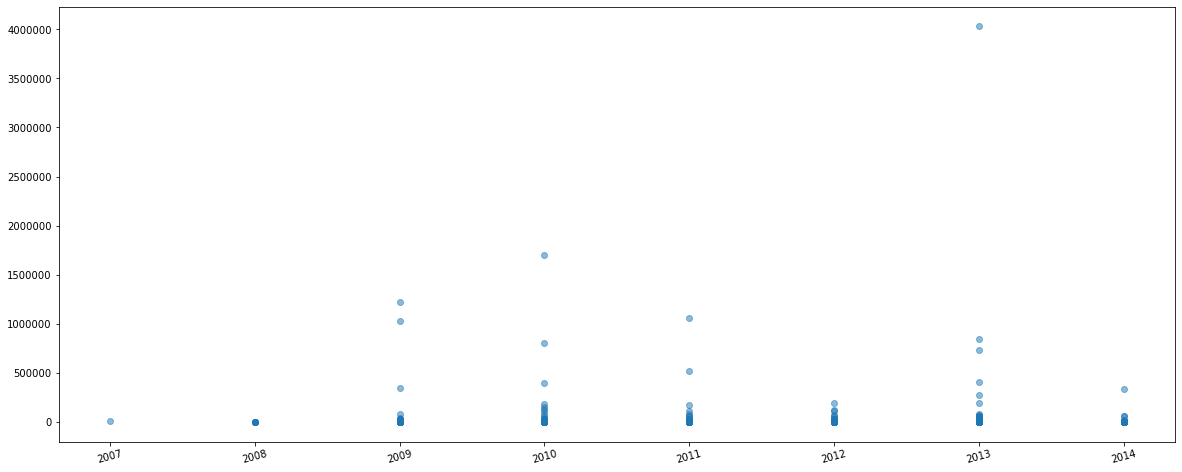

In [35]:
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Individuals_Affected', x = 'year', alpha=1/2)
plt.xticks(rotation=15)

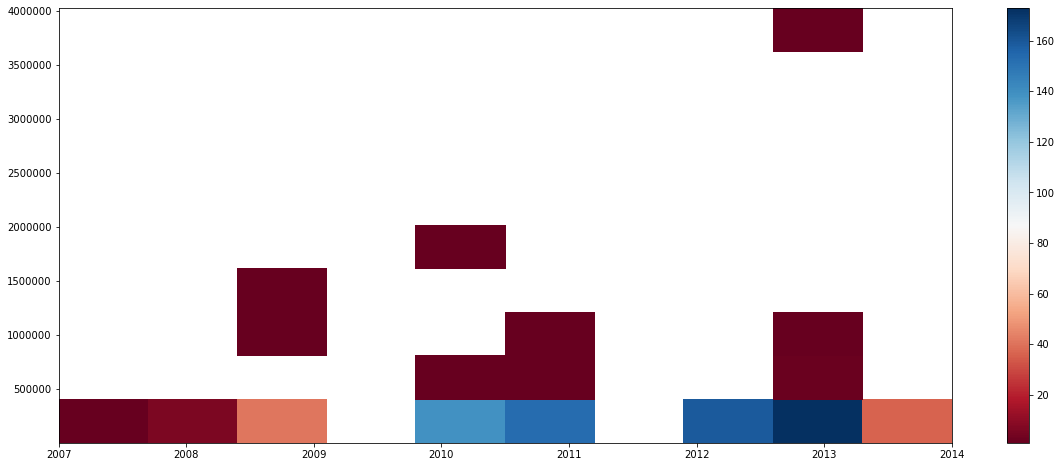

In [38]:
plt.figure(figsize=(20,8))
plt.hist2d(data = df, y = 'Individuals_Affected', x = 'year',cmin=0.5,cmap = 'RdBu')
plt.colorbar()

(array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015.]),
 <a list of 10 Text xticklabel objects>)

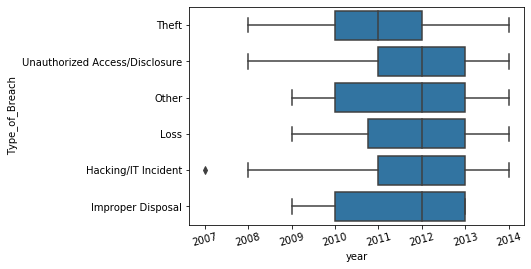

In [40]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y='Type_of_Breach', x='year', color=base_color,order=attack_order)
plt.xticks(rotation=15)

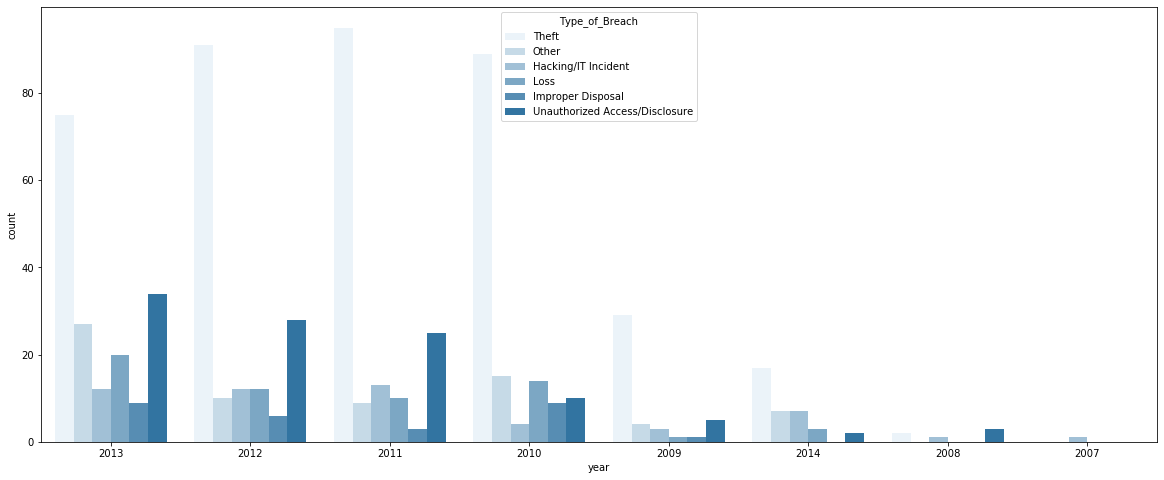

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(data = df, x = 'year', hue = 'Type_of_Breach',color=base_color,order=year_order)

In [46]:
ct_counts = df.groupby(['Type_of_Breach', 'year']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Type_of_Breach', columns = 'year', values = 'count')
ct_counts.head()



year,2007,2008,2009,2010,2011,2012,2013,2014
Type_of_Breach,,,,,,,,
Hacking/IT Incident,1.0,1.0,3.0,4.0,13.0,12.0,12.0,7.0
Improper Disposal,NaN,NaN,1.0,9.0,3.0,6.0,9.0,NaN
Loss,NaN,NaN,1.0,14.0,10.0,12.0,20.0,3.0
Other,NaN,NaN,4.0,15.0,9.0,10.0,27.0,7.0
Theft,NaN,2.0,29.0,89.0,95.0,91.0,75.0,17.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

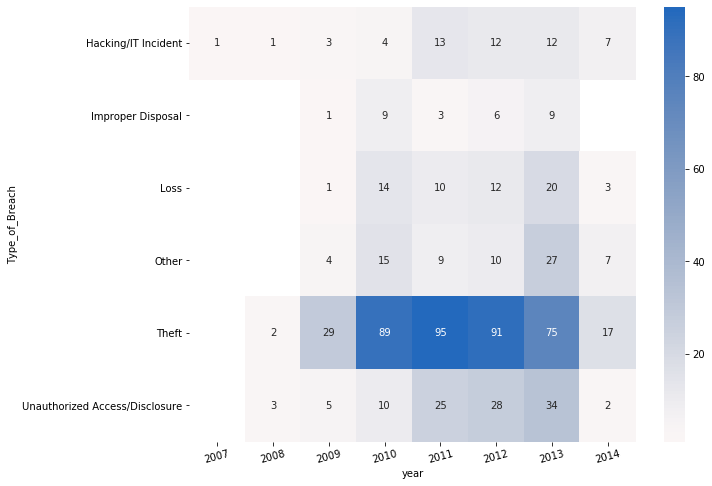

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(ct_counts, annot = True, cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15)